<a href="https://colab.research.google.com/github/osamazafar980/Hair-Color-Chaning-using-Pretrained-Model/blob/main/Hair_Color_Changing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing essential libraries to use
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import tensorflow as tf
from skimage import io


In [2]:
#creating filter to shapen the image and using cv2 to appy that filter.
def sharpen(img):
    kernel = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
    sharpened = cv2.filter2D(img, -1, kernel)
    return np.array(sharpened, dtype=np.uint8)
#taking mask and image and combining with thresholding while increasing intensity of specific channels in hsv format according to the color
def Change_hair_color(image, color=[255, 0, 0]):
    mask = predict(image)
    b, g, r = color
    input_mask = np.zeros_like(image, dtype=np.uint8)
    input_mask[:, :, 0] = b
    input_mask[:, :, 1] = g
    input_mask[:, :, 2] = r
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    tar_hsv = cv2.cvtColor(input_mask, cv2.COLOR_BGR2HSV)
    image_hsv[:, :, 0:2] = tar_hsv[:, :, 0:2]
    changed = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
    changed = sharpen(changed)
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
    imgout = image.copy()
    imgout[mask >0.5] = changed[mask >0.5]
    return imgout
#using pretrained model to get mask prediction by passing image.
def predict(image, height=224, width=224):
    im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im = im / 255
    im = cv2.resize(im, (height, width))
    im = im.reshape((1,) + im.shape)
    pred = model.predict(im)
    mask = pred.reshape((224, 224))
    return mask
#loading pretrained model from hdf5 file.
model = keras.models.load_model('./models/hairnet_matting.hdf5')


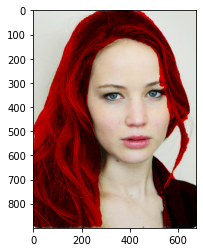

In [3]:
img = cv2.imread('./image.png')
out = Change_hair_color(img,[0,0,255]) #[B,G,R] color input here 
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)

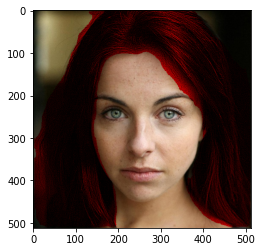

In [4]:
img = cv2.imread('./image1.png')
out = Change_hair_color(img,[0,0,255]) #[B,G,R] color input here 
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)

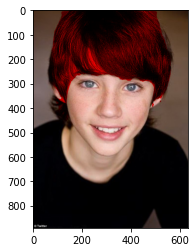

In [5]:
img = cv2.imread('./image2.png')
out = Change_hair_color(img,[0,0,255]) #[B,G,R] color input here 
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)

# Refrences



1.   https://github.com/thangtran480/hair-segmentation
2.   https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv
3. https://t3q5q9i2.rocketcdn.me/wp-content/uploads/2013/03/Jennifer-Lawrence-courtesy-celebs-venue.png
4. https://i.dailymail.co.uk/i/newpix/2018/04/29/14/4BACD13600000578-5670965-image-m-189_1525009312859.jpg
5. https://raw.githubusercontent.com/thangtran480/hair-segmentation/master/test/images/00055.jpg



